# Description

This project leverages data-driven models to analyze the performance of different brands across supermarkets. By examining sales volume, net sales, discount impact, cost efficiency, and product preferences, it aims to identify top-performing brands, effective supermarkets, and optimal product offerings. Utilizing techniques like regression models, time series analysis, and clustering, the project ultimately seeks to empower businesses with actionable insights for targeted pricing, improved inventory management, and customized marketing campaigns

In [38]:
# To start working with the dataset, we will import the following libraries

import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for basic data visualization
import seaborn as sns  # Seaborn for advanced data visualization
from sklearn.cluster import KMeans  # KMeans for clustering
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  # Train-test split for model evaluation
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification
from sklearn.metrics import f1_score, confusion_matrix  # Metrics for model evaluation
from sklearn.svm import SVC  # Support Vector Classifier for classification
import ipywidgets as widgets
from IPython.display import display, clear_output
from tkinter import Tk, filedialog
import numpy_financial as npf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings  # Warnings to suppress unnecessary warnings
warnings.filterwarnings("ignore")

## Loading the date into our environment

In [33]:
def select_file(b):
    clear_output()
    root = Tk()
    root.withdraw()  # Hide the main window
    root.call('wm', 'attributes', '.', '-topmost', True)  # Raise the root to the top of all windows
    b.files = filedialog.askopenfilename(multiple=False)  # List of selected files
    path = b.files
    global df
    df = pd.read_excel(path)
    print(f'Loaded dataframe from {path}')
    display(df.head())

fileselect = widgets.Button(description="File select")
fileselect.on_click(select_file)

display(fileselect)
df.head()

Button(description='File select', style=ButtonStyle())

,Material Number,Material Description,Period,Brand,Size,Pack,Client,Client Type,Volume,Gross Sales,Discounts,Net Sales,Cost of Goods Sold,Distribution,Warehousing
0,11504000,Crocky 250ML 4X,201601,3,250ML,4X,Kroger,3,206.000000,170.802637,-3.091708,167.710929,-79.232317,-4.034226,-1.479495
1,11506000,Crocky 250ML 6X,201601,3,250ML,6X,Kroger,3,147.865268,96.167296,-1.740730,94.426566,-44.610304,-2.271397,-0.833003
2,11508000,Crocky 250ML 8X,201601,3,250ML,8X,Kroger,3,104.924074,83.219005,-1.506352,81.712653,-38.603822,-1.965568,-0.720844
3,11660150,Crocky 330ML 15X,201601,3,2.25L,15X,Kroger,3,72.990660,57.891482,-1.047897,56.843585,-26.854833,-1.367352,-0.501457
4,11660180,Crocky 330ML 18X,201601,3,2.25L,18X,Kroger,3,77.224118,61.249188,-1.108675,60.140513,-28.412413,-1.446658,-0.530541


## Understanding the Data

In [34]:
df.dtypes

Material Number           int64
Material Description     object
Period                    int64
Brand                    object
Size                     object
Pack                     object
Client                   object
Client Type              object
Volume                  float64
Gross Sales             float64
Discounts               float64
Net Sales               float64
Cost of Goods Sold      float64
Distribution            float64
Warehousing             float64
dtype: object

In [31]:
df.shape

(88452, 15)

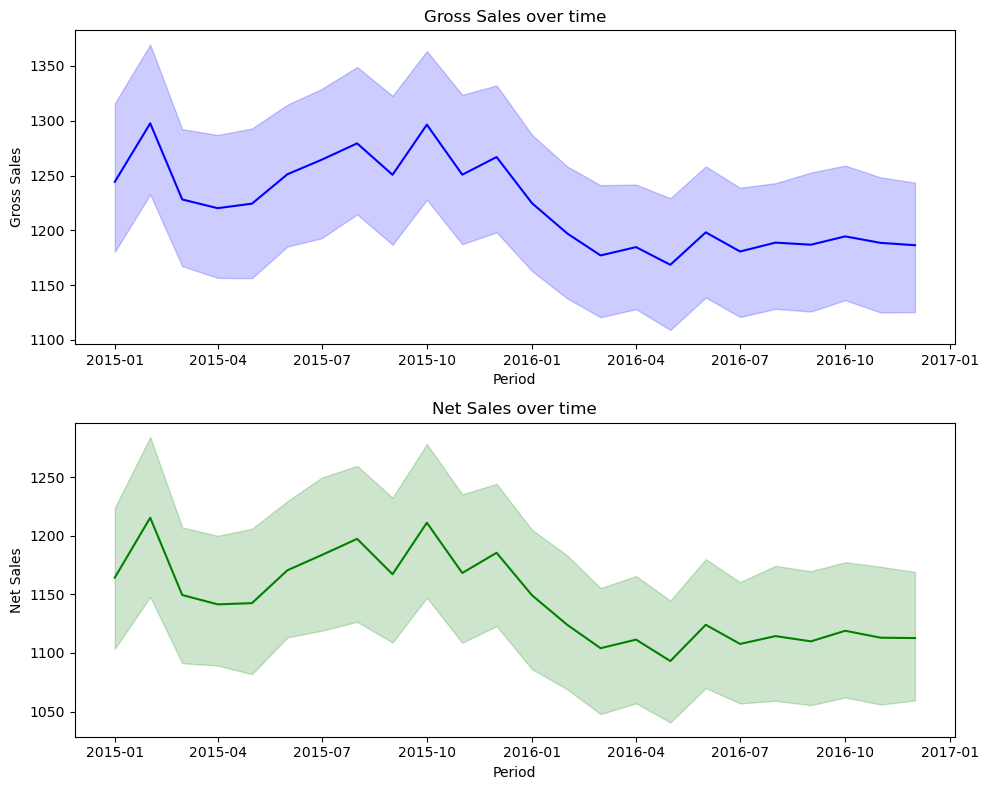

In [5]:
# Convert 'Period' to datetime format
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Set 'Period' as the index of the DataFrame
df.set_index('Period', inplace=True)

# Create line plots for time-series data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.lineplot(data=df['Gross Sales'], ax=axes[0], color='blue')
axes[0].set_title('Gross Sales over time')
axes[0].set_ylabel('Gross Sales')

sns.lineplot(data=df['Net Sales'], ax=axes[1], color='green')
axes[1].set_title('Net Sales over time')
axes[1].set_ylabel('Net Sales')

plt.tight_layout()
plt.show()

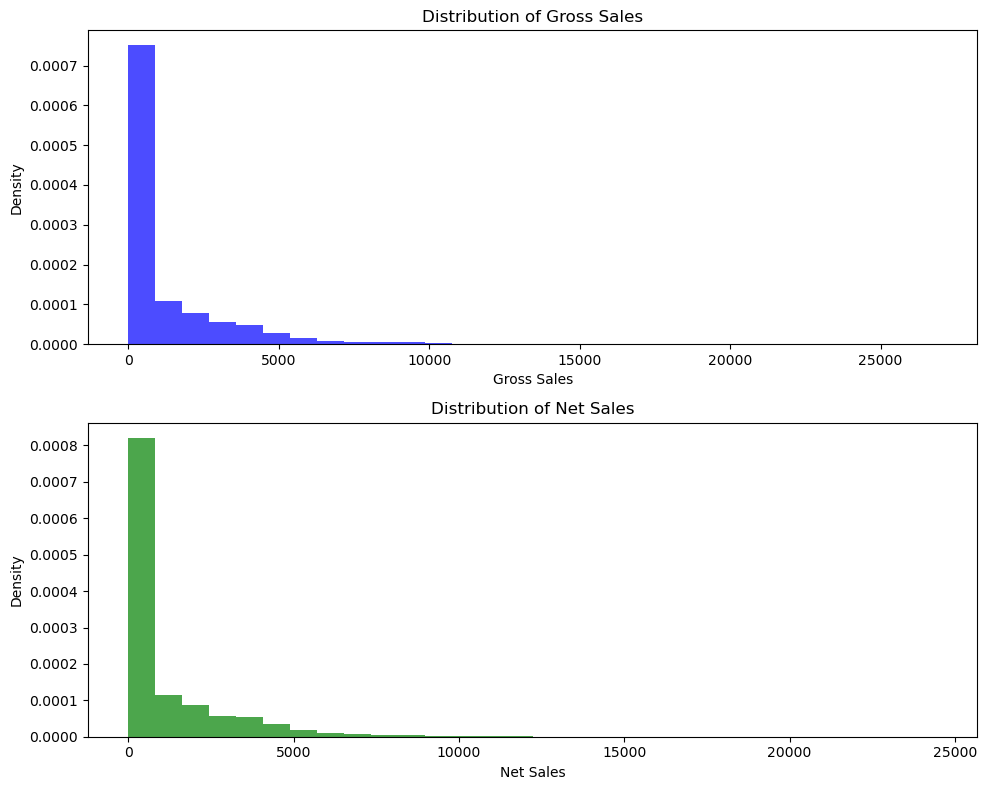

In [8]:
# Create histograms for distribution of continuous data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Histogram for Gross Sales
axes[0].hist(df['Gross Sales'], bins=30, color='blue', alpha=0.7, density=True)
axes[0].set_title('Distribution of Gross Sales')
axes[0].set_xlabel('Gross Sales')
axes[0].set_ylabel('Density')

# Histogram for Net Sales
axes[1].hist(df['Net Sales'], bins=30, color='green', alpha=0.7, density=True)
axes[1].set_title('Distribution of Net Sales')
axes[1].set_xlabel('Net Sales')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Key Metrics

In [9]:
# Check if there are any missing values in the DataFrame
if df.isnull().sum().any():
    print("There are missing values in the DataFrame. Please handle them before proceeding.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


### 1. Brand Performance

In [10]:
# Group the data by 'Brand'
grouped = df.groupby('Brand')

# Calculate total and average 'Volume' and 'Net Sales' for each brand
total_volume = grouped['Volume'].sum()
average_volume = grouped['Volume'].mean()
total_net_sales = grouped['Net Sales'].sum()
average_net_sales = grouped['Net Sales'].mean()

# Print the results
print("Total Volume per Brand:\n", total_volume)
print("\nAverage Volume per Brand:\n", average_volume)
print("\nTotal Net Sales per Brand:\n", total_net_sales)
print("\nAverage Net Sales per Brand:\n", average_net_sales)

Total Volume per Brand:
 Brand
Buratino           2.244022e+06
Buratino Orange    3.331195e+06
Buratino Peach     9.309816e+05
Crocky             8.076105e+05
Dundy Diet         3.672293e+07
Dundy Free         2.348370e+07
Dundy Max          2.008057e+07
Dundy One          1.245010e+07
Evan               1.095706e+07
Evan Vitamin       8.933957e+04
Pit Bull           1.190693e+06
Pit Bull Extra     2.834238e+05
Pit Bull Power     1.838700e+05
Zumba              4.913843e+05
Zumba Mix          6.409339e+05
Zumba Orange       1.686058e+06
Name: Volume, dtype: float64

Average Volume per Brand:
 Brand
Buratino            328.746334
Buratino Orange     523.772749
Buratino Peach      337.067905
Crocky              101.662957
Dundy Diet         3197.190820
Dundy Free         6302.656667
Dundy Max          3706.270606
Dundy One          1742.247330
Evan               1146.375389
Evan Vitamin         37.193824
Pit Bull            266.255087
Pit Bull Extra       96.337109
Pit Bull Power      11

### 2. Supermarket Performance

In [13]:
# Filter the data for supermarkets only
df_supermarkets = df[df['Client Type'] == 'Supermarkets']

# Group the data by 'Client'
grouped = df_supermarkets.groupby('Client')

# Calculate total and average 'Volume' and 'Net Sales' for each supermarket
total_volume = grouped['Volume'].sum()
average_volume = grouped['Volume'].mean()
total_net_sales = grouped['Net Sales'].sum()
average_net_sales = grouped['Net Sales'].mean()

# Print the results
print("Total Volume per Supermarket:\n", total_volume)
print("\nAverage Volume per Supermarket:\n", average_volume)
print("\nTotal Net Sales per Supermarket:\n", total_net_sales)
print("\nAverage Net Sales per Supermarket:\n", average_net_sales)

Total Volume per Supermarket:
 Client
Albertsons                7.577522e+06
HEB                       9.680636e+06
Kroger                    5.113931e+06
Publix                    4.733886e+06
Safeway                   2.021952e+06
ShopRite                  1.049567e+07
Walmart - Supermarkets    8.081069e+06
WinCo Foods               1.067766e+07
Name: Volume, dtype: float64

Average Volume per Supermarket:
 Client
Albertsons                1160.416817
HEB                       1284.926435
Kroger                    1143.033277
Publix                     755.005780
Safeway                    448.326461
ShopRite                  1434.226313
Walmart - Supermarkets    1717.184267
WinCo Foods               1257.082308
Name: Volume, dtype: float64

Total Net Sales per Supermarket:
 Client
Albertsons                6.421498e+06
HEB                       8.252988e+06
Kroger                    4.790410e+06
Publix                    3.983357e+06
Safeway                   1.979925e+06
ShopRite  

### 3. Client Type Performance

In [14]:
# Group the data by 'Client Type'
grouped = df.groupby('Client Type')

# Calculate total and average 'Volume' and 'Net Sales' for each client type
total_volume = grouped['Volume'].sum()
average_volume = grouped['Volume'].mean()
total_net_sales = grouped['Net Sales'].sum()
average_net_sales = grouped['Net Sales'].mean()

# Print the results
print("Total Volume per Client Type:\n", total_volume)
print("\nAverage Volume per Client Type:\n", average_volume)
print("\nTotal Net Sales per Client Type:\n", total_net_sales)
print("\nAverage Net Sales per Client Type:\n", average_net_sales)

Total Volume per Client Type:
 Client Type
Big-box         1.642400e+07
Discounters     2.818725e+07
Grocery         1.258030e+07
Supermarkets    5.838232e+07
Name: Volume, dtype: float64

Average Volume per Client Type:
 Client Type
Big-box         1510.947730
Discounters     1498.046746
Grocery         1408.768456
Supermarkets    1171.488913
Name: Volume, dtype: float64

Total Net Sales per Client Type:
 Client Type
Big-box         1.444691e+07
Discounters     2.490414e+07
Grocery         1.109055e+07
Supermarkets    5.081657e+07
Name: Net Sales, dtype: float64

Average Net Sales per Client Type:
 Client Type
Big-box         1329.062963
Discounters     1323.561606
Grocery         1241.942611
Supermarkets    1019.675844
Name: Net Sales, dtype: float64


### 4. Discount Impact

In [15]:
# Group the data by 'Brand' and 'Client'
grouped = df.groupby(['Brand', 'Client'])

# Calculate correlation between 'Discounts' and 'Volume' for each group
correlations = grouped.apply(lambda x: x['Discounts'].corr(x['Volume']))

# Print the results
print("Correlation between Discounts and Volume for each Brand and Store:\n", correlations)

Correlation between Discounts and Volume for each Brand and Store:
 Brand         Client                
Buratino      Albertsons               -0.999836
              Costco                   -0.999196
              HEB                      -0.999871
              Kmart Super Center       -0.999675
              Kroger                   -0.999450
                                          ...   
Zumba Orange  Super Target             -0.999938
              Trader Joe's             -0.999953
              Walmart - Discounters    -0.999958
              Walmart - Supermarkets   -0.999956
              WinCo Foods              -0.999900
Length: 197, dtype: float64


### 5. Cost Efficiency

In [17]:
# Group the data by 'Brand' and 'Client Type'
grouped = df.groupby(['Brand', 'Client Type'])

# Calculate total costs (COGS, distribution, and warehousing) for each group
total_costs = grouped[['Cost of Goods Sold', 'Distribution', 'Warehousing']].sum().sum(axis=1)

# Calculate total net sales for each group
total_net_sales = grouped['Net Sales'].sum()

# Calculate the ratio of total costs to net sales
cost_efficiency = total_costs / total_net_sales

# Print the results
print("Cost Efficiency for each Brand and Store:\n", cost_efficiency)

Cost Efficiency for each Brand and Store:
 Brand            Client Type 
Buratino         Big-box        -0.228144
                 Discounters    -0.229765
                 Grocery        -0.229733
                 Supermarkets   -0.229938
Buratino Orange  Big-box        -0.304520
                                   ...   
Zumba Mix        Supermarkets   -0.667955
Zumba Orange     Big-box        -0.602518
                 Discounters    -0.598340
                 Grocery        -0.597949
                 Supermarkets   -0.598626
Length: 64, dtype: float64


### 6. Product Preference

In [18]:
# Option A.
# Group the data by 'Brand', 'Client', and 'Size'
grouped_size = df.groupby(['Brand', 'Client', 'Size'])

# Calculate total 'Volume' for each group
total_volume_size = grouped_size['Volume'].sum()

# Find the most and least popular product size for each brand and supermarket
most_popular_size = total_volume_size.idxmax()
least_popular_size = total_volume_size.idxmin()

# Print the results
print("Most Popular Product Size for each Brand and Store:\n", most_popular_size)
print("\nLeast Popular Product Size for each Brand and Store:\n", least_popular_size)


Most Popular Product Size for each Brand and Store:
 ('Dundy Max', 'Walmart - Supermarkets', '2.25L')

Least Popular Product Size for each Brand and Store:
 ('Crocky', 'Walmart - Supermarkets', '250ML')


In [20]:
# Option B.
# Group the data by 'Brand', 'Client', and 'Pack'
grouped_pack = df.groupby(['Brand', 'Client', 'Pack'])

# Calculate total 'Volume' for each group
total_volume_pack = grouped_pack['Volume'].sum()

# Find the most and least popular product pack for each brand and supermarket
most_popular_pack = total_volume_pack.idxmax()
least_popular_pack = total_volume_pack.idxmin()

# Print the results
print("Most Popular Product Pack for each Brand and Store:\n", most_popular_pack)
print("\nLeast Popular Product Pack for each Brand and Store:\n", least_popular_pack)

Most Popular Product Pack for each Brand and Store:
 ('Dundy Free', "Sam's Club", '4X')

Least Popular Product Pack for each Brand and Store:
 ('Crocky', 'Walmart - Discounters', '4X')


## Problem Questions

In [21]:
# 1. Which brand has the highest performance in terms of sales volume and net sales across different stores?

# Group the data by 'Brand'
grouped = df.groupby('Brand')

# Calculate total 'Volume' and 'Net Sales' for each brand
total_volume = grouped['Volume'].sum()
total_net_sales = grouped['Net Sales'].sum()

# Find the brand with the highest total volume and net sales
highest_volume_brand = total_volume.idxmax()
highest_net_sales_brand = total_net_sales.idxmax()

# Print the results
print("Brand with the Highest Sales Volume:\n", highest_volume_brand)
print("\nBrand with the Highest Net Sales:\n", highest_net_sales_brand)

Brand with the Highest Sales Volume:
 Dundy Diet

Brand with the Highest Net Sales:
 Dundy Diet


In [22]:
# 2. Which client type (Store) and client (name of store) generates the highest sales volume and net sales for different brands?

# Group the data by 'Brand', 'Client Type', and 'Client'
grouped = df.groupby(['Brand', 'Client Type', 'Client'])

# Calculate total 'Volume' and 'Net Sales' for each group
total_volume = grouped['Volume'].sum()
total_net_sales = grouped['Net Sales'].sum()

# Find the client type and client with the highest total volume and net sales for each brand
highest_volume_client = total_volume.idxmax()
highest_net_sales_client = total_net_sales.idxmax()

# Print the results
print("Client Type and Client with the Highest Sales Volume for each Brand:\n", highest_volume_client)
print("\nClient Type and Client with the Highest Net Sales for each Brand:\n", highest_net_sales_client)

Client Type and Client with the Highest Sales Volume for each Brand:
 ('Dundy Diet', 'Supermarkets', 'Albertsons')

Client Type and Client with the Highest Net Sales for each Brand:
 ('Dundy Diet', 'Supermarkets', 'Albertsons')


In [23]:
# 3. How do discounts impact the sales volume of each brand in each Store (Client Type, and Client)?

# Group the data by 'Brand', 'Client Type', and 'Client'
grouped = df.groupby(['Brand', 'Client Type', 'Client'])

# Calculate correlation between 'Discounts' and 'Volume' for each group
correlations = grouped.apply(lambda x: x['Discounts'].corr(x['Volume']))

# Print the results
print("Correlation between Discounts and Volume for each Brand, Client Type, and Client:\n", correlations)


Correlation between Discounts and Volume for each Brand, Client Type, and Client:
 Brand         Client Type   Client                
Buratino      Big-box       Costco                   -0.999196
                            Sam's Club               -0.999528
              Discounters   Kmart Super Center       -0.999675
                            Super Target             -0.999764
              Grocery       Trader Joe's             -0.999719
                                                        ...   
Zumba Orange  Supermarkets  Publix                   -0.999956
                            Safeway                  -0.999916
                            ShopRite                 -0.999888
                            Walmart - Supermarkets   -0.999956
                            WinCo Foods              -0.999900
Length: 197, dtype: float64


In [24]:
# 4. Which brand and Store have the most cost-efficient operations?

# Group the data by 'Brand', 'Client Type', and 'Client'
grouped = df.groupby(['Brand', 'Client Type', 'Client'])

# Calculate total costs (COGS, distribution, and warehousing) for each group
total_costs = grouped[['Cost of Goods Sold', 'Distribution', 'Warehousing']].sum().sum(axis=1)

# Calculate total net sales for each group
total_net_sales = grouped['Net Sales'].sum()

# Calculate the ratio of total costs to net sales
cost_efficiency = total_costs / total_net_sales

# Find the brand and store with the most cost-efficient operations
most_cost_efficient = cost_efficiency.idxmin()

# Print the results
print("Brand and Store with the Most Cost-Efficient Operations:\n", most_cost_efficient)

Brand and Store with the Most Cost-Efficient Operations:
 ('Pit Bull Power', 'Big-box', "Sam's Club")


In [25]:
# 5. What are the most and least popular product sizes or packs for each brand and store?

# Group the data by 'Brand', 'Client Type', 'Client', and 'Pack'
grouped_pack = df.groupby(['Brand', 'Client Type', 'Client', 'Pack'])

# Calculate total 'Volume' for each group
total_volume_pack = grouped_pack['Volume'].sum()

# Find the most and least popular product pack for each brand and store
most_popular_pack = total_volume_pack.idxmax()
least_popular_pack = total_volume_pack.idxmin()

# Print the results
print("Most Popular Product Pack for each Brand and Store:\n", most_popular_pack)
print("\nLeast Popular Product Pack for each Brand and Store:\n", least_popular_pack)

Most Popular Product Pack for each Brand and Store:
 ('Dundy Free', 'Big-box', "Sam's Club", '4X')

Least Popular Product Pack for each Brand and Store:
 ('Crocky', 'Discounters', 'Walmart - Discounters', '4X')


### Visualizing Key Metrics

#### Brand Performance

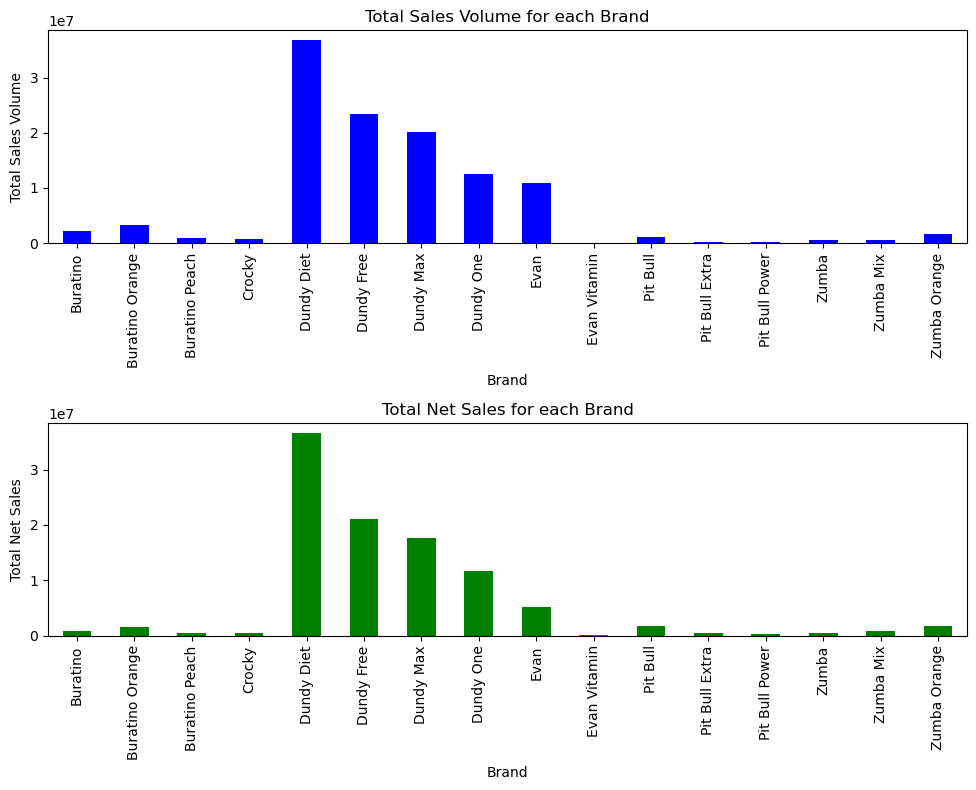

In [26]:
# Group the data by 'Brand'
grouped = df.groupby('Brand')

# Calculate total 'Volume' and 'Net Sales' for each brand
total_volume = grouped['Volume'].sum()
total_net_sales = grouped['Net Sales'].sum()

# Plot total 'Volume' and 'Net Sales' for each brand
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
total_volume.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Total Sales Volume for each Brand')
axes[0].set_ylabel('Total Sales Volume')
total_net_sales.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Total Net Sales for each Brand')
axes[1].set_ylabel('Total Net Sales')
plt.tight_layout()
plt.show()

#### Client Type Performance

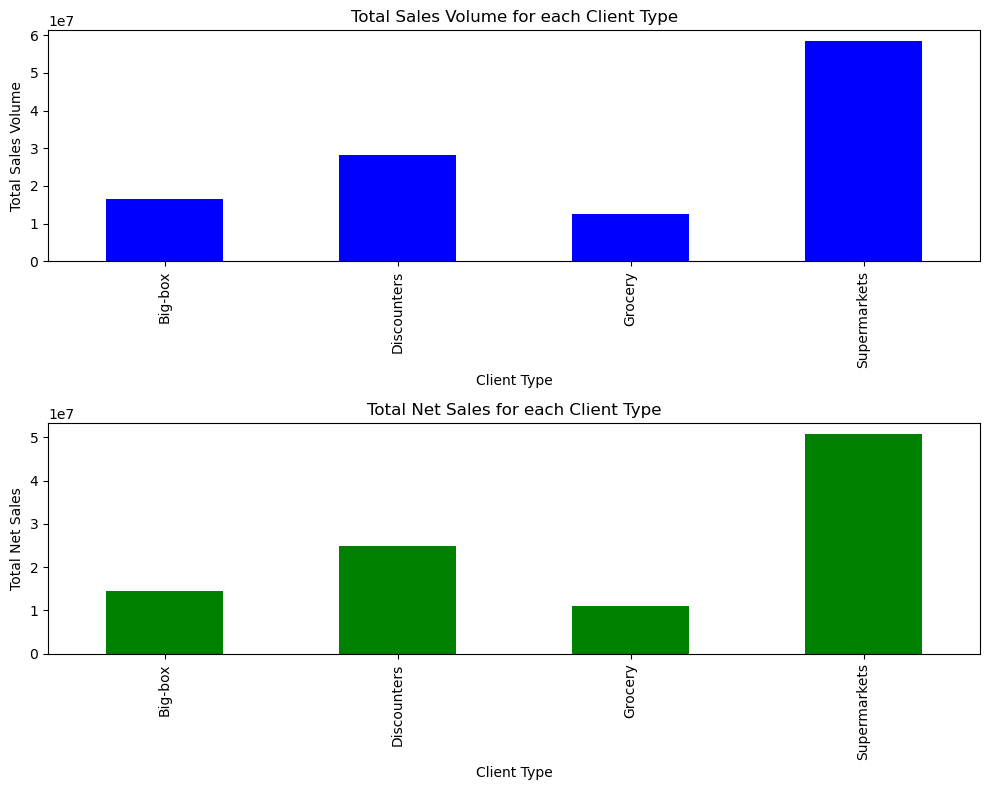

In [27]:
# Group the data by 'Client Type'
grouped = df.groupby('Client Type')

# Calculate total 'Volume' and 'Net Sales' for each client type
total_volume = grouped['Volume'].sum()
total_net_sales = grouped['Net Sales'].sum()

# Plot total 'Volume' and 'Net Sales' for each client type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
total_volume.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Total Sales Volume for each Client Type')
axes[0].set_ylabel('Total Sales Volume')
total_net_sales.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Total Net Sales for each Client Type')
axes[1].set_ylabel('Total Net Sales')
plt.tight_layout()
plt.show()

#### Discount Impact

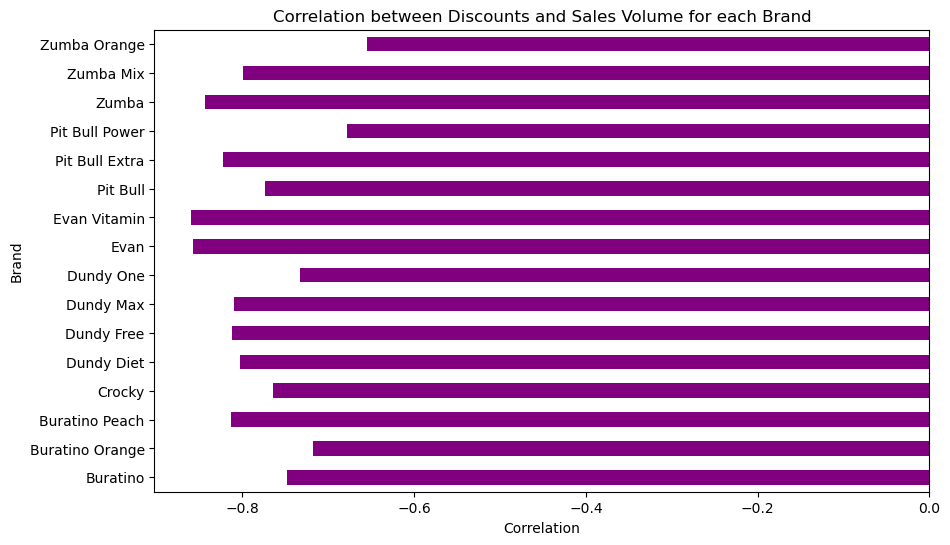

In [29]:
# Calculate correlation between 'Discounts' and 'Volume' for each brand
grouped = df.groupby('Brand')
correlations = grouped.apply(lambda x: x['Discounts'].corr(x['Volume']))

# Plot correlation between 'Discounts' and 'Volume' for each brand
correlations.plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Correlation between Discounts and Sales Volume for each Brand')
plt.xlabel('Correlation')  # Change ylabel to xlabel
plt.show()

#### Cost Efficiency

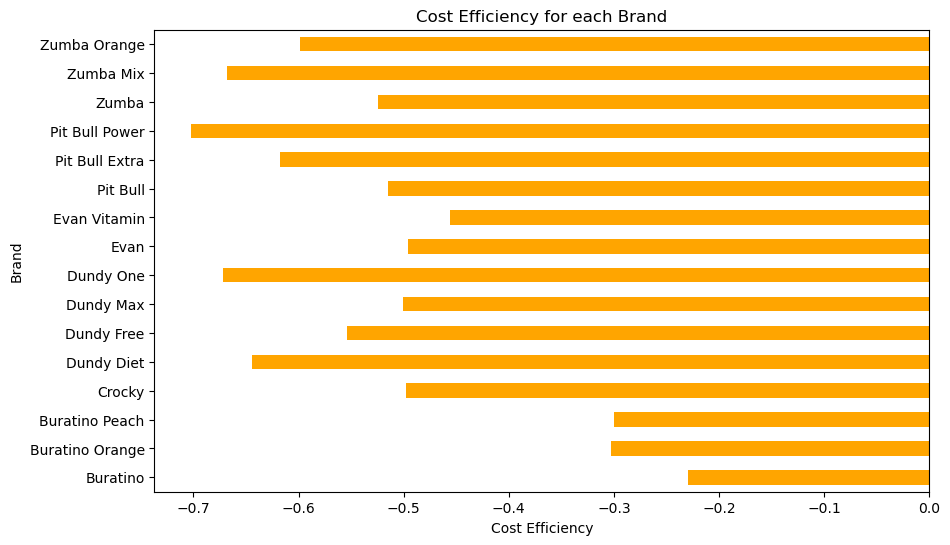

In [31]:
# Group the data by 'Brand'
grouped = df.groupby('Brand')

# Calculate total costs (COGS, distribution, and warehousing) for each brand
total_costs = grouped[['Cost of Goods Sold', 'Distribution', 'Warehousing']].sum().sum(axis=1)

# Calculate total net sales for each brand
total_net_sales = grouped['Net Sales'].sum()

# Calculate the ratio of total costs to net sales
cost_efficiency = total_costs / total_net_sales

# Plot cost efficiency for each brand (horizontal bar chart)
cost_efficiency.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Cost Efficiency for each Brand')
plt.xlabel('Cost Efficiency')  # Change ylabel to xlabel
plt.show()

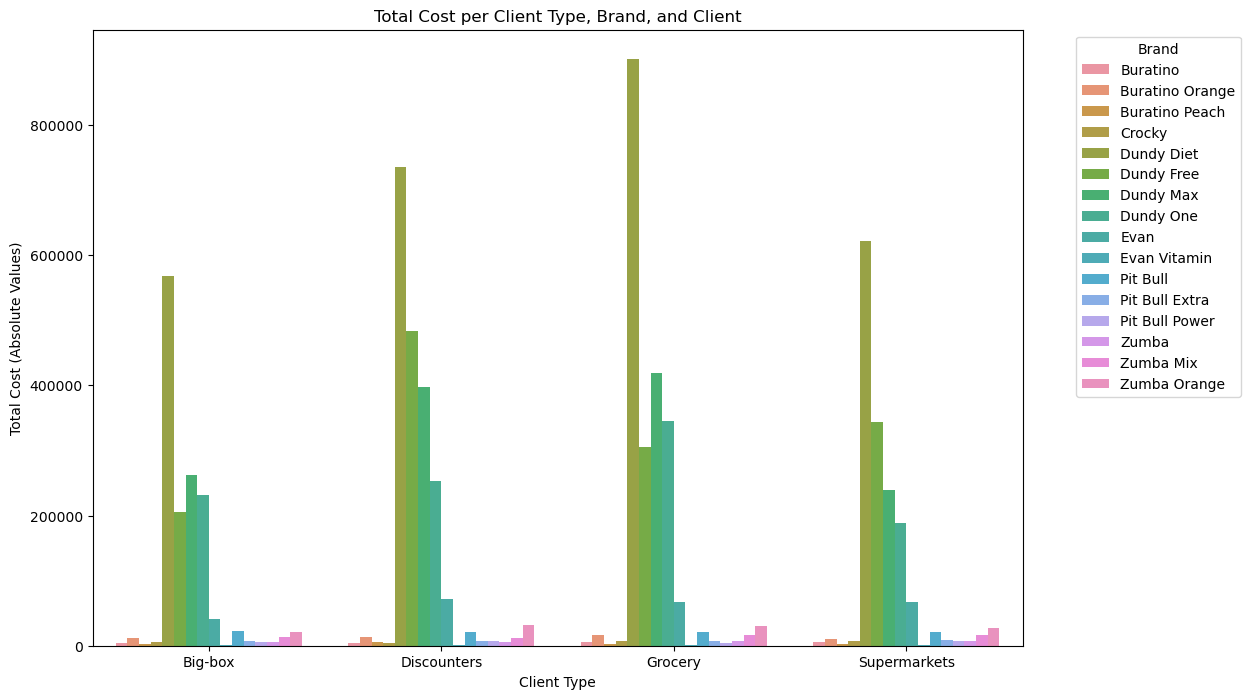

In [41]:
# Create a copy of the DataFrame to avoid overwriting the original dataset
df5 = df.copy()

# Take absolute values of the cost-related variables
df5[['Cost of Goods Sold', 'Distribution', 'Warehousing']] = df5[['Cost of Goods Sold', 'Distribution', 'Warehousing']].abs()

# Group by Client Type, Brand, and Client and sum the cost-related variables
grouped_df = df5.groupby(['Client Type', 'Brand', 'Client'])[['Cost of Goods Sold', 'Distribution', 'Warehousing']].sum().reset_index()

# Melt the DataFrame for better visualization
melted_df = pd.melt(grouped_df, id_vars=['Client Type', 'Brand', 'Client'], value_vars=['Cost of Goods Sold', 'Distribution', 'Warehousing'])

# Plotting the total cost (absolute values) per Client Type, Brand, and Client
plt.figure(figsize=(12, 8))
sns.barplot(x='Client Type', y='value', hue='Brand', data=melted_df, ci=None)
plt.title('Total Cost per Client Type, Brand, and Client')
plt.xlabel('Client Type')
plt.ylabel('Total Cost (Absolute Values)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Models

### 1. Linear Regression Model

In [33]:
# Calculate total costs (COGS, distribution, and warehousing)
df['Total Costs'] = df['Cost of Goods Sold'] + df['Distribution'] + df['Warehousing']

# Define the independent variables (Discounts and Total Costs) and the dependent variable (Net Sales)
X = df[['Discounts', 'Total Costs']]
y = df['Net Sales']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.173e+06
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:26:30   Log-Likelihood:            -6.0118e+05
No. Observations:               88452   AIC:                         1.202e+06
Df Residuals:                   88449   BIC:                         1.202e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.5826      0.856     15.871      

In [37]:
# Calculate VIF for each independent variable
X = df[['Discounts', 'Total Costs']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

   VIF Factor     features
0    6.230344    Discounts
1    6.230344  Total Costs


In [36]:
# Define the independent variables (Discounts and Total Costs) and the dependent variable (Net Sales)
X = df[['Discounts', 'Total Costs']]
y = df['Net Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients: ", ridge.coef_)

Coefficients:  [-0.97039972 -1.58564088]


### 2. Time Series Analysis

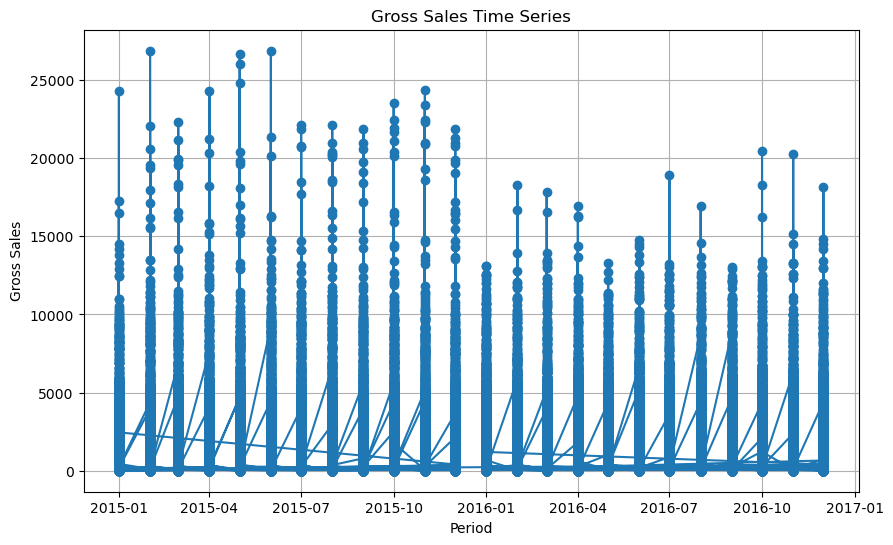

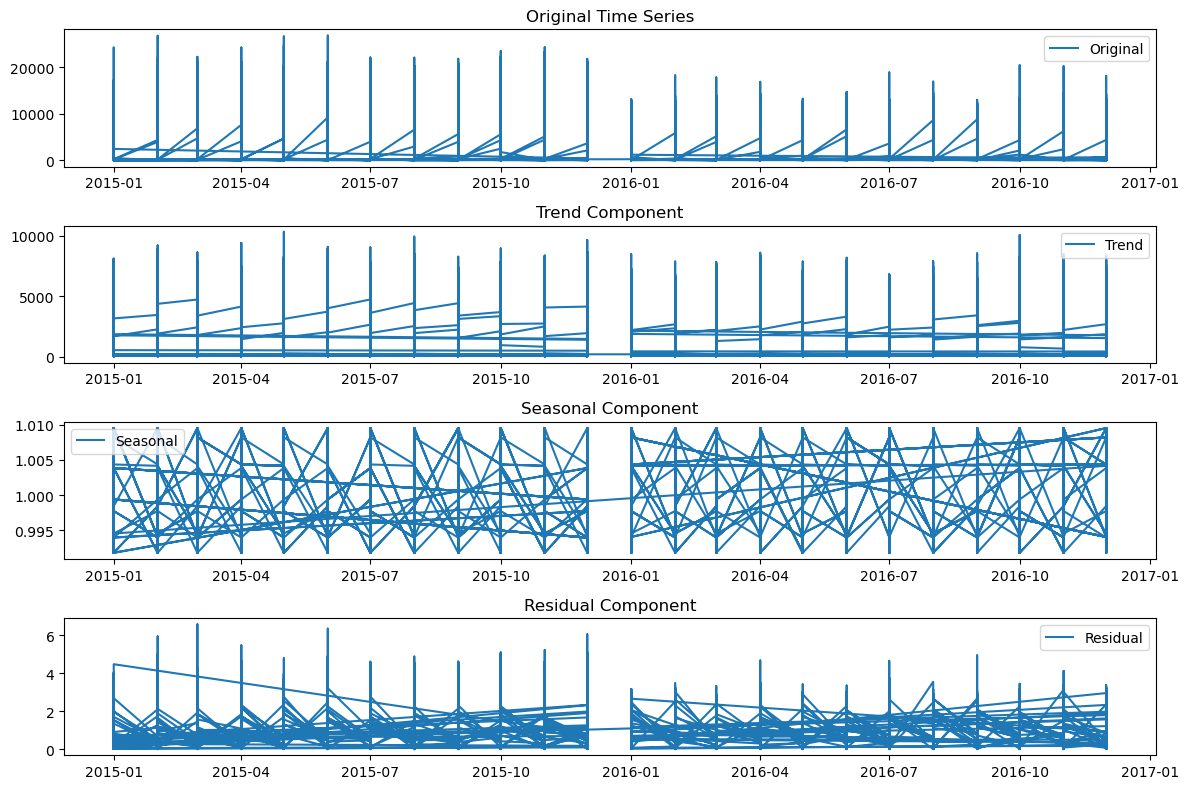

In [42]:
# Plotting Gross Sales to visualize trends and seasonality.
plt.figure(figsize=(10, 6))
plt.plot(df['Gross Sales'], marker='o', label='Gross Sales')
plt.title('Gross Sales Time Series')
plt.xlabel('Period')
plt.ylabel('Gross Sales')
plt.grid(True)
plt.show()

# Add a small constant to avoid zero and negative values
small_constant = 1e-10
adjusted_gross_sales = df['Gross Sales'] + small_constant

# Using seasonal_decompose from statsmodels to observe trend and seasonality more clearly.
result = seasonal_decompose(adjusted_gross_sales, model='multiplicative', period=12)

# Customize the plot layout for better visibility
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(adjusted_gross_sales, label='Original')
plt.title('Original Time Series')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


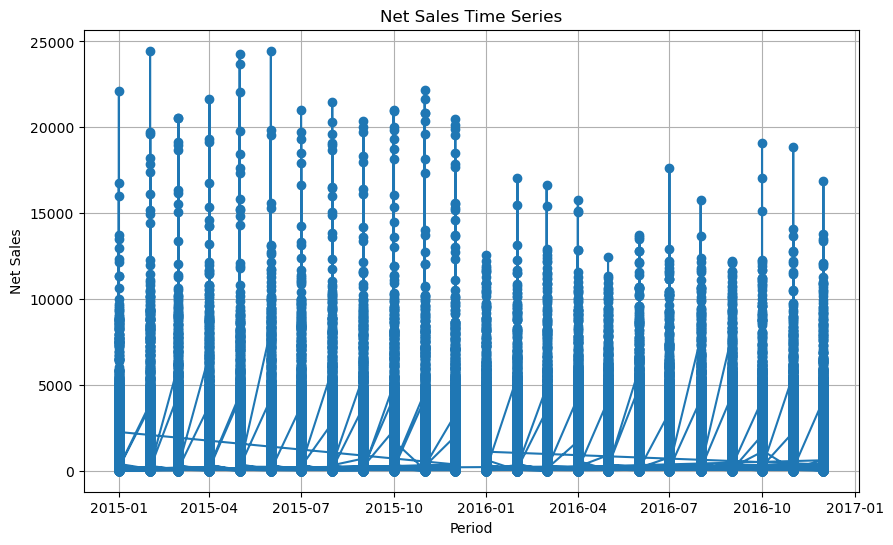

In [43]:
# Plotting Net Sales to visualize trends and seasonality.
plt.figure(figsize=(10, 6))
plt.plot(df['Net Sales'], marker='o', label='Net Sales')
plt.title('Net Sales Time Series')
plt.xlabel('Period')
plt.ylabel('Net Sales')
plt.grid(True)
plt.show()

### 3. Clustering Model

In [49]:
# Select relevant columns for clustering
df_cluster = df[['Gross Sales', 'Net Sales', 'Cost of Goods Sold', 'Distribution', 'Warehousing']]

# Convert categorical variables to numeric using get_dummies (one-hot encoding)
df_cluster = pd.get_dummies(df_cluster)

# Standardize the data to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(df_cluster)

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=30)  # You can change the number of clusters
kmeans.fit(X_std)

# Add the cluster labels for each data point to the dataframe
df_cluster['Cluster'] = kmeans.labels_

# Print out the first few rows of the dataframe
print(df_cluster.head())

            Gross Sales   Net Sales  Cost of Goods Sold  Distribution  \
Period                                                                  
2016-01-01   170.802637  167.710929          -79.232317     -4.034226   
2016-01-01    96.167296   94.426566          -44.610304     -2.271397   
2016-01-01    83.219005   81.712653          -38.603822     -1.965568   
2016-01-01    57.891482   56.843585          -26.854833     -1.367352   
2016-01-01    61.249188   60.140513          -28.412413     -1.446658   

            Warehousing  Cluster  
Period                            
2016-01-01    -1.479495        0  
2016-01-01    -0.833003        0  
2016-01-01    -0.720844        0  
2016-01-01    -0.501457        0  
2016-01-01    -0.530541        0  


### 4. Decision Tree Regression Model

In [39]:
# Create a copy of the original dataframe
df2 = df.copy()

# Convert categorical variables to category type
df2['Brand'] = df2['Brand'].astype('category')

# Group by 'Brand' and sum 'Net Sales'
df2 = df2.groupby(['Brand'])['Net Sales'].sum().reset_index()

# Split the data into training and testing sets
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)

# Create mappings between numerical codes and actual names
brand_mapping = dict(enumerate(train_data['Brand'].cat.categories))

# Convert categorical variables to numerical IDs
train_data['Brand'] = train_data['Brand'].cat.codes

# Separate features and target variable
X_train = train_data.drop('Net Sales', axis=1)
y_train = train_data['Net Sales']

# Create and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Get predictions for all brands
brands = train_data['Brand'].unique()

for brand_code in brands:
    # Get the actual brand name using the mapping
    brand_name = brand_mapping[brand_code]
    predicted_sales = model.predict([[brand_code]])
    print(f"Predicted Net Sales for {brand_name}: {predicted_sales[0]}")

Predicted Net Sales for Zumba: 542754.0055298582
Predicted Net Sales for Pit Bull Extra: 484659.439846228
Predicted Net Sales for Evan: 5080769.821567724
Predicted Net Sales for Evan Vitamin: 67814.44310286368
Predicted Net Sales for Buratino Peach: 414474.6915508332
Predicted Net Sales for Zumba Orange: 1806196.8754824733
Predicted Net Sales for Dundy Diet: 36630292.141238436
Predicted Net Sales for Dundy One: 11759221.036846494
Predicted Net Sales for Pit Bull: 1755091.6993079535
Predicted Net Sales for Pit Bull Power: 320343.2551118128
Predicted Net Sales for Crocky: 546087.3577301532
Predicted Net Sales for Dundy Max: 17580127.627037674


### 5. Random Forest Regressor 

In [37]:
# Create a copy of the original dataframe
df4 = df.copy()

# Initialize the label encoder
label_encoder = LabelEncoder()

# Create mappings between numerical codes and actual names
brand_mapping = dict(enumerate(df4['Brand'].astype('category').cat.categories))
client_type_mapping = dict(enumerate(df4['Client Type'].astype('category').cat.categories))

# Convert categorical variables to numerical using Label Encoding
df4['Brand'] = label_encoder.fit_transform(df4['Brand'])
df4['Client Type'] = label_encoder.fit_transform(df4['Client Type'])

# Select features (Brand and Client Type) and target variable (Volume)
X = df4[['Brand', 'Client Type']]
y = df4['Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the top 10 predictions
for i, prediction in enumerate(y_pred[:10]):
    print(f"Prediction {i+1}: {prediction}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Prediction 1: 319.7765503193881
Prediction 2: 354.9564648361262
Prediction 3: 3701.4941560258258
Prediction 4: 3088.727124085146
Prediction 5: 3681.726111064973
Prediction 6: 6504.6318290878735
Prediction 7: 3177.6297132910045
Prediction 8: 6504.6318290878735
Prediction 9: 6044.67846598913
Prediction 10: 3088.727124085146
Mean Squared Error: 1344315.3991973598
R-squared: 0.6501275693190132
